In [10]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
data = load_breast_cancer()
x = data.data
y = data.target

x.shape

(569, 30)

In [13]:
lrl1 = LR(penalty = 'l1',solver = 'liblinear',C = 0.5,max_iter = 1000)
lrl2 = LR(penalty = 'l2',solver = 'liblinear',C = 0.5,max_iter = 1000)

# 逻辑回归的重要属性coef_,查看每个特征所对应的参数
lrl1 = lrl1.fit(x,y)
lrl1.coef_

array([[ 3.99529523,  0.03174544, -0.13645804, -0.01620733,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50432451,  0.        , -0.07125455,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24560666, -0.12844496, -0.01442084,  0.        ,
         0.        , -2.0470115 ,  0.        ,  0.        ,  0.        ]])

In [14]:
(lrl1.coef_ != 0).sum(axis =1)

array([10])

In [15]:
lrl2 = lrl2.fit(x,y)
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

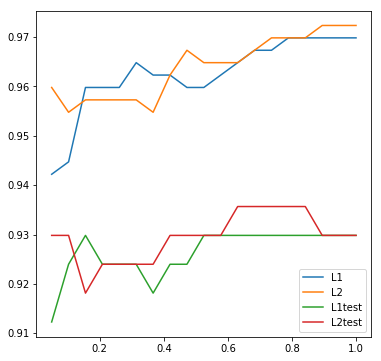

In [18]:
# 对比正则化的优劣
l1 = []
l2 = []
l1test = []
l2test = []

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state =420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty = 'l1',solver = 'liblinear',C =i,max_iter = 1000)
    lrl2 = LR(penalty = 'l2',solver = 'liblinear',C =i,max_iter = 1000)
    
    lrl1 = lrl1.fit(xtrain,ytrain)
    l1.append(accuracy_score(lrl1.predict(xtrain),ytrain))
    l1test.append(accuracy_score(lrl1.predict(xtest),ytest))
    
    lrl2 = lrl2.fit(xtrain,ytrain)
    l2.append(accuracy_score(lrl2.predict(xtrain),ytrain))
    l2test.append(accuracy_score(lrl2.predict(xtest),ytest))
    
graph = [l1,l2,l1test,l2test] 
color = ['green','black','lightgreen','gray']
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize =(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],label = label[i])
plt.legend(loc =4)
plt.show()
